### Multiple Regression

In [20]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import sklearn.metrics as metrics
import scipy.stats as stats

In [21]:
"""The following code opens our modified dataset for model processing.
We then converted the variables Year, Month, Wea into objective 
variables so the model can identify them as categorical"""

ocean = pd.read_csv('ocean1.csv', index_col=0)
ocean[['Year', 'Month', 'Wea']] = ocean[['Year', 'Month', 'Wea']].astype('object')
ocean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 765355 to 830772
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Salnty       2000 non-null   float64
 1   Depthm       2000 non-null   int64  
 2   T_degC       2000 non-null   float64
 3   O2ml_L       2000 non-null   float64
 4   STheta       2000 non-null   float64
 5   O2Sat        2000 non-null   float64
 6   Oxy_µmol/Kg  2000 non-null   float64
 7   Year         2000 non-null   object 
 8   Month        2000 non-null   object 
 9   Bottom_D     2000 non-null   float64
 10  Wea          2000 non-null   object 
dtypes: float64(7), int64(1), object(3)
memory usage: 187.5+ KB


In [22]:
df = ocean.copy()
dummies = pd.get_dummies(df, drop_first=True)
dummies

/var/folders/20/kt9gy6bn5dbdfmxkq50cn7ch0000gn/T/ipykernel_96362/416143781.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df, drop_first=True)
/var/folders/20/kt9gy6bn5dbdfmxkq50cn7ch0000gn/T/ipykernel_96362/416143781.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df, drop_first=True)
/var/folders/20/kt9gy6bn5dbdfmxkq50cn7ch0000gn/T/ipykernel_96362/416143781.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df, drop_first=True)


,Salnty,Depthm,T_degC,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,Bottom_D,Year_2005,Year_2006,...,Month_7,Month_8,Month_9,Month_10,Month_11,Wea_1.0,Wea_2.0,Wea_3.0,Wea_4.0,Wea_6.0
765355,34.155,500,5.63,0.70,26.936,10.0,30.44201,3935.0,0,0,...,1,0,0,0,0,1,0,0,0,0
765398,34.148,200,9.25,2.08,26.415,32.2,90.50218,635.0,0,0,...,1,0,0,0,0,1,0,0,0,0
765400,34.184,250,8.72,1.75,26.528,26.8,76.13528,635.0,0,0,...,1,0,0,0,0,1,0,0,0,0
765402,34.259,300,8.50,1.20,26.621,18.3,52.20232,635.0,0,0,...,1,0,0,0,0,1,0,0,0,0
765405,34.301,400,7.81,0.70,26.759,10.5,30.44726,635.0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817760,34.108,250,8.03,1.45,26.573,21.8,63.08076,1339.0,0,0,...,0,0,0,0,0,1,0,0,0,0
817762,34.166,300,7.58,1.12,26.685,16.7,48.71913,1339.0,0,0,...,0,0,0,0,0,1,0,0,0,0
817765,34.191,400,6.95,0.72,26.794,10.6,31.31612,1339.0,0,0,...,0,0,0,0,0,1,0,0,0,0
817767,34.255,500,6.03,0.40,26.966,5.7,17.39493,1339.0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [23]:
"""The following code splits into predictor variables (x) 
and the target variable (y). Then the data is split into 80% of the data is used for training (x_train and y_train) 
and 20% is used for testing (x_test and y_test). Finally, a multi regression model is fit."""
x = dummies.iloc[:, 1:]
y = dummies.iloc[:, :1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

mlr = LinearRegression()  
mlr.fit(x_train, y_train)
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 Salnty   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.302e+04
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:24:37   Log-Likelihood:                 7012.3
No. Observations:                2000   AIC:                        -1.396e+04
Df Residuals:                    1970   BIC:                        -1.380e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.6088      0.183     19.692      

In [24]:
""" The code is evaluating the performance of the linear regression model using various metrics"""
y_pred = mlr.predict(x_test)
x = dummies.iloc[:, 1:]
# print(y_pred)

meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('R squared: {:.2f}'.format(mlr.score(x, y) * 100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 99.61
Mean Absolute Error: 0.004887305668804381
Mean Square Error: 0.0002015434138962788
Root Mean Square Error: 0.014196598673494957


In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
"""This code preforms a 10 k-fold validaton """


# Split the data into features (x) and target variable (y)
x = dummies.iloc[:, 1:]
y = dummies.iloc[:, :1]

# Split the data into training, validation, and testing sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=100)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=100)

# Linear Regression Model Fitting
mlr = LinearRegression()

# Combine training and validation sets for cross-validation
x_combined = pd.concat([x_train, x_val], axis=0)
y_combined = pd.concat([y_train, y_val], axis=0)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(mlr, x_combined, y_combined, cv=10, scoring='r2')

# Train the model on the combined training and validation sets
mlr.fit(x_combined, y_combined)

# Model performance on training set
train_r2 = mlr.score(x_train, y_train) * 100
train_meanAbErr = metrics.mean_absolute_error(y_train, mlr.predict(x_train))
train_meanSqErr = metrics.mean_squared_error(y_train, mlr.predict(x_train))
train_rootMeanSqErr = np.sqrt(train_meanSqErr)

print('Training Set Performance:')
print('R squared: {:.2f}'.format(train_r2))
print('Mean Absolute Error:', train_meanAbErr)
print('Mean Squared Error:', train_meanSqErr)
print('Root Mean Squared Error:', train_rootMeanSqErr)

# Model performance on testing set
test_r2 = mlr.score(x_test, y_test) * 100
test_meanAbErr = metrics.mean_absolute_error(y_test, mlr.predict(x_test))
test_meanSqErr = metrics.mean_squared_error(y_test, mlr.predict(x_test))
test_rootMeanSqErr = np.sqrt(test_meanSqErr)

print('\nTesting Set Performance:')
print('R squared: {:.2f}'.format(test_r2))
print('Mean Absolute Error:', test_meanAbErr)
print('Mean Squared Error:', test_meanSqErr)
print('Root Mean Squared Error:', test_rootMeanSqErr)

# Cross-validation scores
print('\nCross-Validation Scores:')
print('R squared scores:', cv_scores)
print('Average R squared: {:.2f}'.format(np.mean(cv_scores) * 100))

# Calculate and print cross-validated Mean Squared Error
cv_mse_scores = cross_val_score(mlr, x_combined, y_combined, cv=10, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_mse_scores 
print('Mean Squared Error scores:', cv_mse_scores)
print('Average Mean Squared Error: {:.4f}'.format(np.mean(cv_mse_scores)))


Training Set Performance:
R squared: 99.80
Mean Absolute Error: 0.004094777308968663
Mean Squared Error: 3.531337822158197e-05
Root Mean Squared Error: 0.005942506055662204

Testing Set Performance:
R squared: 98.41
Mean Absolute Error: 0.005222956234987753
Mean Squared Error: 0.0002683325479825813
Root Mean Squared Error: 0.016380859195493418

Cross-Validation Scores:
R squared scores: [0.9898476  0.99821694 0.99779791 0.99638603 0.9967286  0.99775037
 0.9974443  0.99828619 0.99739981 0.99815199]
Average R squared: 99.68
Mean Squared Error scores: [2.92156743e-04 3.15527921e-05 2.80960970e-05 6.01855965e-05
 5.22819094e-05 2.79730109e-05 3.61549985e-05 4.37502647e-05
 5.71977701e-05 2.72969416e-05]
Average Mean Squared Error: 0.0001


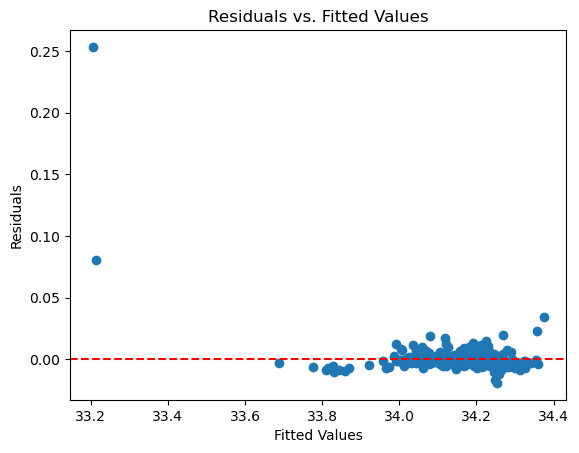

In [26]:
""" This code produces a Residuals vs. Fitted Values plot """


# Get the predicted values
y_pred = mlr.predict(x_test)

# Calculate residuals
residuals = y_test - y_pred

# Plotting
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


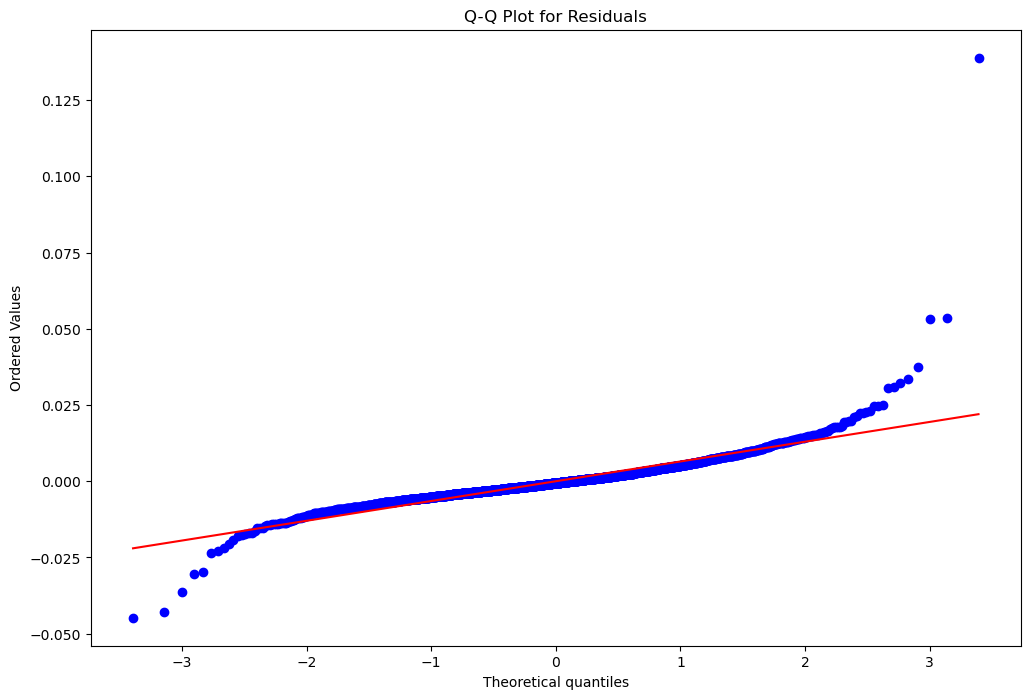

In [27]:
""" This code produces a Q-Q plot for Residuals """

residuals = model.resid
std_resid = residuals 

# Q-Q plot
plt.figure(figsize=(12, 8))
probplot(std_resid, plot=plt)
plt.title('Q-Q Plot for Residuals')
plt.show()


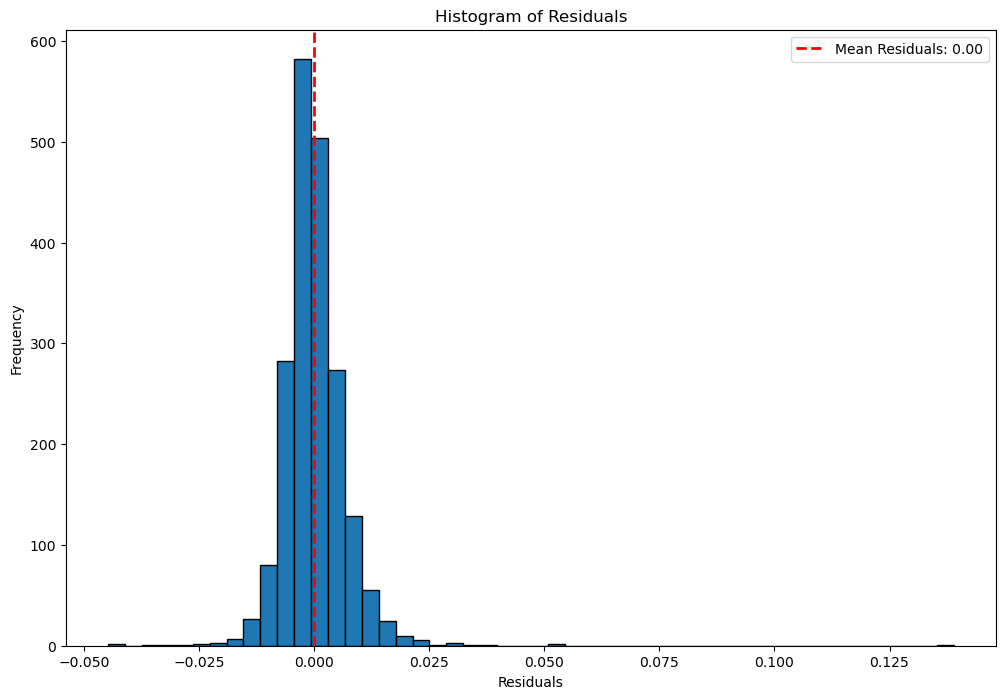

In [30]:
"Code creates a Histogram of residuals"

residuals = model.resid

plt.figure(figsize=(12, 8))
plt.hist(residuals, bins=50, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Calculate and plot the mean of residuals
mean_residuals = residuals.mean()
plt.axvline(x=mean_residuals, color='red', linestyle='dashed', linewidth=2, label=f'Mean Residuals: {mean_residuals:.2f}')

plt.legend()
plt.show()

In [31]:
""" Finding the Variance Inflation Factor values of the data"""


mlr = LinearRegression()  
mlr.fit(x_train, y_train)


x_train = sm.add_constant(x_train)

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Variable"] = x_train.columns
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

# Display VIF values
print("VIF values:")
print(vif_data)

VIF values:
       Variable           VIF
0         const  1.341043e+06
1        Depthm  1.337401e+01
2        T_degC  5.530980e+01
3        O2ml_L  1.111390e+08
4        STheta  1.159853e+02
5         O2Sat  1.732988e+04
6   Oxy_µmol/Kg  1.137236e+08
7      Bottom_D  2.087716e+00
8     Year_2005  3.245420e+00
9     Year_2006  3.959703e+00
10    Year_2007  3.402616e+00
11    Year_2008  1.023429e+00
12    Year_2009  1.109309e+00
13    Year_2010  2.097963e+00
14    Year_2011  1.493467e+00
15    Year_2012  2.900211e+00
16      Month_2  2.382532e+00
17      Month_3  1.197249e+00
18      Month_4  2.270243e+00
19      Month_6  1.149362e+00
20      Month_7  2.741833e+00
21      Month_8  1.452679e+00
22      Month_9  1.746622e+00
23     Month_10  1.764869e+00
24     Month_11  2.434151e+00
25      Wea_1.0  2.606298e+00
26      Wea_2.0  2.691648e+00
27      Wea_3.0  1.013404e+00
28      Wea_4.0  1.351270e+00
29      Wea_6.0  1.073211e+00
